Dataset: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data
Predicting the diagnosis of breast tissues as malignant or benign

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/breast_cancer_wisconsin.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data=pd.read_csv(file_path)
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


### Handling Missing Data (if any)

In [ ]:
data.drop(columns=['Unnamed: 32'], inplace=True)

### Extract features (X) and labels (y)

In [ ]:
X = data.iloc[:, 2:]
y = data['diagnosis']

In [ ]:
print("", len(X))

 569


### Map 'M' (Malignant) to 1 and 'B' (Benign) to 0

In [ ]:
y = y.map({'M': 1, 'B': 0})

### Split the data into training and testing sets

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Feature Scaling

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Build the ANN model

In [ ]:

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


### Compile the model

In [ ]:

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Train the ANN model

In [ ]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
13/13 [==============================] - 1s 18ms/step - loss: 0.5178 - accuracy: 0.7412 - val_loss: 0.3126 - val_accuracy: 0.9415
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.2757 - accuracy: 0.9196 - val_loss: 0.1865 - val_accuracy: 0.9532
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1901 - accuracy: 0.9497 - val_loss: 0.1344 - val_accuracy: 0.9649
Epoch 4/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1449 - accuracy: 0.9673 - val_loss: 0.1069 - val_accuracy: 0.9766
Epoch 5/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1186 - accuracy: 0.9749 - val_loss: 0.0895 - val_accuracy: 0.9766
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.1004 - accuracy: 0.9824 - val_loss: 0.0796 - val_accuracy: 0.9883
Epoch 7/100
13/13 [==============================] - 0s 6ms/step - loss: 0.0887 - accuracy: 0.9799 - val_loss: 0.0744 - val_accuracy: 0.9883
Epoch 8/100


### Calculate accuracy

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred_binary)

print(f"Accuracy: {accuracy * 100:.2f}%")

6/6 [==============================] - 0s 3ms/step
Accuracy: 98.25%


### Plot training and validation loss/accuracy

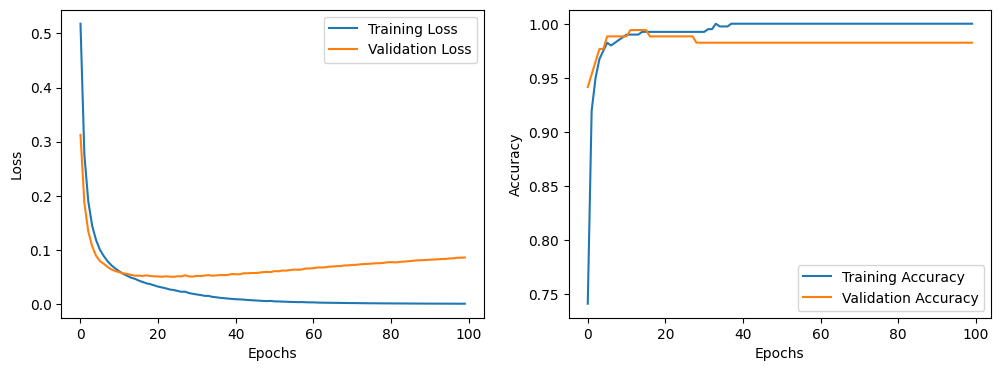

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
